In [1]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')

In [2]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# dataset = dataset.drop(columns=['No.','flight'])

In [4]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:, 1] = le.fit_transform(dataset.iloc[:, 1])
dataset.iloc[:, 4] = le.fit_transform(dataset.iloc[:, 4])
dataset.iloc[:, 5] = le.fit_transform(dataset.iloc[:, 5])

In [6]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

In [8]:
dataset

array([[0.02173913, 0.        , 0.3212268 , ..., 1.        , 1.        ,
        0.25161076],
       [0.        , 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00963595],
       [0.2173913 , 1.        , 0.45843422, ..., 0.        , 0.66666667,
        0.05311516],
       ...,
       [0.        , 0.        , 0.56201238, ..., 0.        , 0.66666667,
        0.00810808],
       [0.06521739, 0.        , 0.26472962, ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 0.        , 0.35270379, ..., 1.        , 0.33333333,
        0.44724873]])

In [9]:
# dataset = pd.DataFrame(data=dataset)

In [10]:
X = dataset[:, 0:6]
Y = dataset[:, -1]

In [11]:
X

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [12]:
Y

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)

In [14]:
X_train.shape

(1070, 6)

In [15]:
X_test.shape

(268, 6)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [17]:
# define the keras model
model = Sequential(name='sequential_1')
model.add(Dense(12, input_dim=6, activation='relu', name='dense_1'))
model.add(Dense(1,  activation='linear', name='output'))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

In [18]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 output (Dense)              (None, 1)                 13        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=107)

Epoch 1/100
10/10 [==============================] - 0s 899us/step - loss: 0.0643
Epoch 2/100
10/10 [==============================] - 0s 889us/step - loss: 0.0240
Epoch 3/100
10/10 [==============================] - 0s 1000us/step - loss: 0.0178
Epoch 4/100
10/10 [==============================] - 0s 999us/step - loss: 0.0136
Epoch 5/100
10/10 [==============================] - 0s 999us/step - loss: 0.0119
Epoch 6/100
10/10 [==============================] - 0s 999us/step - loss: 0.0110
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 8/100
10/10 [==============================] - 0s 1000us/step - loss: 0.0096
Epoch 9/100
10/10 [==============================] - 0s 900us/step - loss: 0.0093
Epoch 10/100
10/10 [==============================] - 0s 887us/step - loss: 0.0091
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 12/100
10/10 [==============================] - 0s 889us/step - loss: 0.0087
Epoch 13/100
10

In [21]:
hist.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [22]:
hist.history.keys()

dict_keys(['loss'])

In [23]:
loss = hist.history['loss']

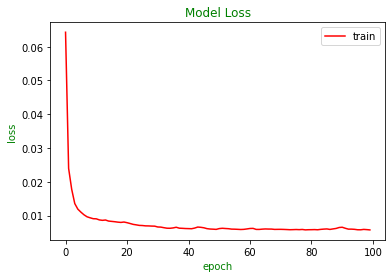

<Figure size 432x288 with 0 Axes>

In [24]:
from matplotlib import pyplot as plt
# plot training loss
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

In [25]:
history_test = model.evaluate(X_test, Y_test, batch_size=107)

3/3 [==============================] - 0s 1ms/step - loss: 0.0054


In [26]:
history_train = model.evaluate(X_train, Y_train, batch_size=107)

10/10 [==============================] - 0s 1ms/step - loss: 0.0057


In [27]:
history_test

0.005366354715079069

In [28]:
history_train

0.0056923627853393555